In [171]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')

#### Importing dataset for EDA

In [172]:
walmart = pd.read_csv("Datasets/Walmart DataSet.csv" , parse_dates=['Date'] ,encoding='utf-8')

In [173]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Understanding Dataset

In [174]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Converting Date column to Datetime dtype 

In [175]:
walmart['Date'] = pd.to_datetime(walmart['Date'], format='%d-%m-%Y',errors='coerce')

In [215]:
walmart

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

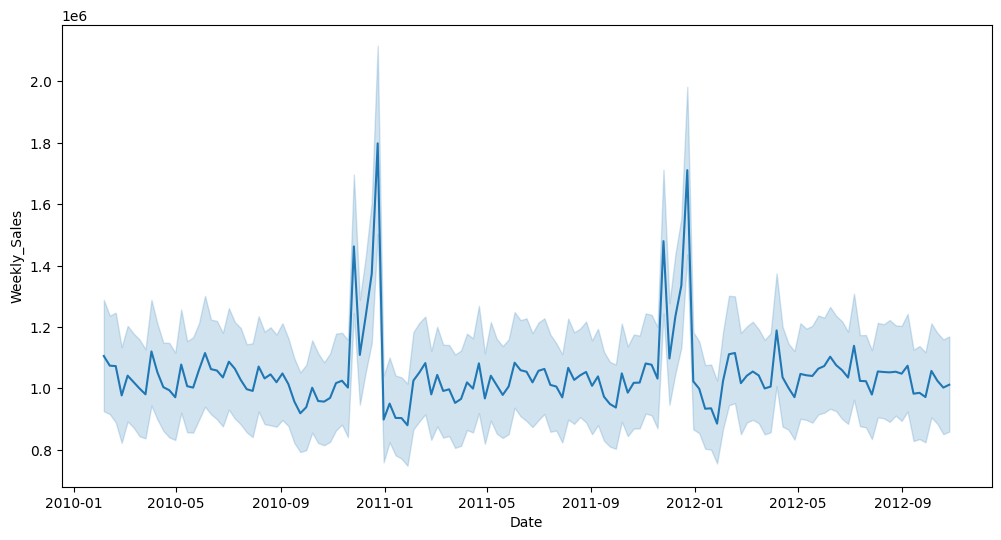

In [218]:
plt.figure(figsize=(12,6))
sns.lineplot(walmart , x='Date' ,y='Weekly_Sales')

#### Checking for NaN or null values in datasets

In [177]:
walmart.isna().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

#### Checking for Duplicates aswell

In [178]:
walmart.duplicated().any()

False

### Q1. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [179]:
sales_Unemp = walmart[['Weekly_Sales','Unemployment']]
sales_Unemp

,Weekly_Sales,Unemployment
0,1643690.90,8.106
1,1641957.44,8.106
2,1611968.17,8.106
3,1409727.59,8.106
4,1554806.68,8.106
...,...,...
6430,713173.95,8.684
6431,733455.07,8.667
6432,734464.36,8.667
6433,718125.53,8.667


##### checking for correlation between both columns

In [180]:
sales_Unemp['Weekly_Sales'].corr(sales_Unemp['Unemployment'])

-0.10617608965795418

##### Sales and Unemployment shows negetive correlation of -0.1 , with this we can infer that rise of unemployment may lead to lesser sales and vice versa , we can conclude that weekly sales are affected by unemployment rate.

#### Now as we know stores sales will be affected by more unemployment rate.

In [219]:
store_analysis = walmart.groupby('Store').agg({
    'Unemployment' : 'mean',
    'Weekly_Sales' : 'mean'
})
store_analysis.head()

,Unemployment,Weekly_Sales
Store,,
1,7.610420,1.555264e+06
2,7.623846,1.925751e+06
3,7.176986,4.027044e+05
4,5.964692,2.094713e+06
5,6.295406,3.180118e+05


#### Aggregating  mean unemployment and weekly sales w.r.t store above can give value associated with respective stores

In [182]:
store_analysis

,Unemployment,Weekly_Sales
Store,,
1,7.610420,1.555264e+06
2,7.623846,1.925751e+06
3,7.176986,4.027044e+05
4,5.964692,2.094713e+06
5,6.295406,3.180118e+05
6,6.606902,1.564728e+06
7,8.585734,5.706173e+05
8,6.091846,9.087495e+05
9,6.099881,5.439806e+05


In [183]:
store_analysis['Sales_to_unemployment_ratio'] = round(store_analysis['Weekly_Sales']/store_analysis['Unemployment'],2)

In [184]:
suffered_store = store_analysis.sort_values(by='Sales_to_unemployment_ratio' , ascending=True).index[0]

#### finding ratio between both columns such as Sales by unemployment ratio will give sales per unemployment rate , lesser sales means suffered more

In [185]:
suffered_store

38

#### Store 38 has suffered more with above EDA

### Q2. If the weekly sales show a seasonal trend, when and what could be the reason?

In [186]:
def lineplot1(df, date, sales):
    sns.lineplot(data=df , x=date , y=sales)
    plt.xticks(rotation=45)
    plt.title(f'{date} vs {sales} plot')
    plt.show()



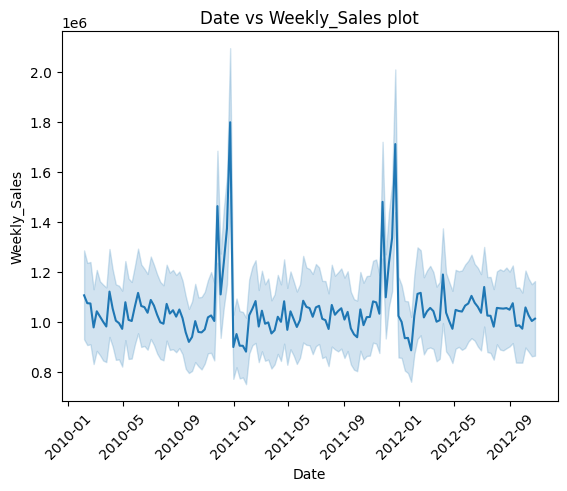

In [187]:
lineplot1(walmart , 'Date', 'Weekly_Sales')

#### Above plot shows seasonal trend near end of the each year which can say probably around Christmas , starting from October to December there are seasonal trend reasons can be as follows:
#### 1. Christmas 
#### 2. Black friday
#### 3. Thanksgiving Season

### Q3. Does temperature affect the weekly sales in any manner?

In [188]:
walmart['Temperature'].corr(walmart['Weekly_Sales'])

-0.06381001317946955

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

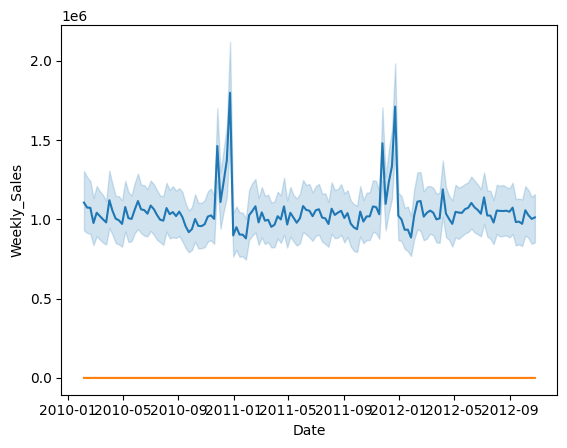

In [189]:
sns.lineplot(walmart , x='Date' , y='Weekly_Sales')
sns.lineplot(walmart , x='Date' , y='Temperature')

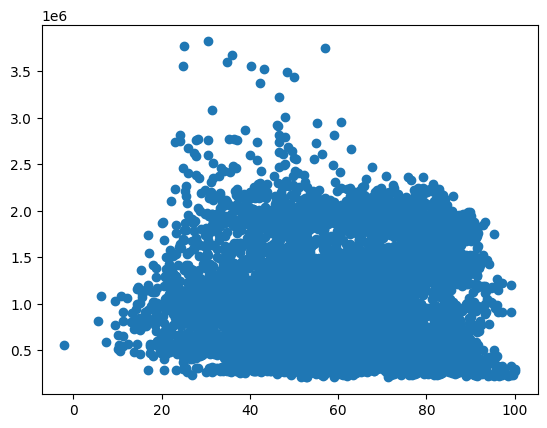

In [190]:
plt.scatter(walmart['Temperature'], walmart['Weekly_Sales'])

### Q4. How is the Consumer Price index affecting the weekly sales of various stores?

In [191]:
cpvswee = walmart.groupby('Store').agg({
    'CPI' : 'mean',
    'Weekly_Sales' : 'mean'
})

In [192]:
cpvswee['CPI'].corr(cpvswee['Weekly_Sales'])

-0.07656886071136425

#### CPI is weak negetively correlated with weekly sales(-0.07)

### Q5. Top performing stores according to the historical data.

In [193]:
performingStore = walmart.groupby('Store')[['Weekly_Sales']].sum()

In [194]:
top_Performing = performingStore.sort_values(by='Weekly_Sales',ascending=False).index[0]
top_Performing

20

In [195]:
least_Performing = performingStore.sort_values(by='Weekly_Sales',ascending=True).index[0]
least_Performing

33

### Q6. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [196]:
best_sales = performingStore.max()[0]
worst_sales = performingStore.min()[0]

In [197]:
diff = ((best_sales - worst_sales)/best_sales)*100

In [198]:
diff

87.67070533042084

## Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [199]:
from statsmodels.tsa.stattools import adfuller  # For Augmented Dickey-Fuller test
from statsmodels.tsa.seasonal import seasonal_decompose  # For seasonal decomposition
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#### Plotting weekly sales to check for stationarity

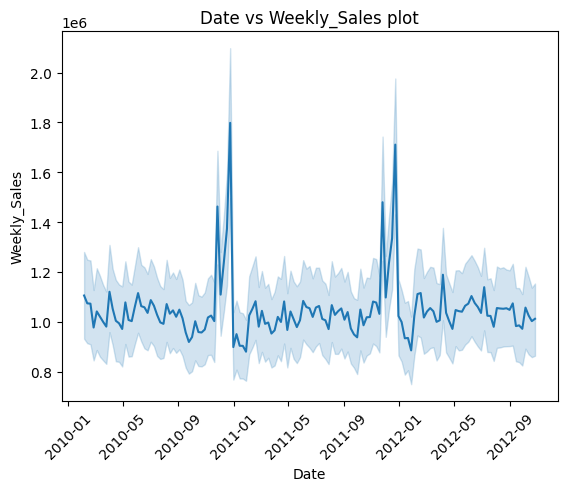

In [200]:
lineplot1(walmart , 'Date' , 'Weekly_Sales')

#### dataset seems stationarity through plotting but there are several peaks and trouphs ( seasonal trend ) , we can use adfuller to ensure its stationarity

In [201]:
def checkStationarity(df):
    timedata = df[['Date', 'Weekly_Sales']]
    timedata.set_index('Date', inplace=True)
    res = adfuller(timedata)
    if res[1] > 0.05:
        print(f'Data is not Stationary with p-value : {res[1]}')
        
    else:
        print(f'Data is Stationary with p-value : {res[1]}')
       

#### below function can help us conclude stationarity of dataset

In [202]:
checkStationarity(walmart)

Data is Stationary with p-value : 0.0001165586969990124


### Calculating Seasonal Decompostiong of dataset for particular store number to get better information 

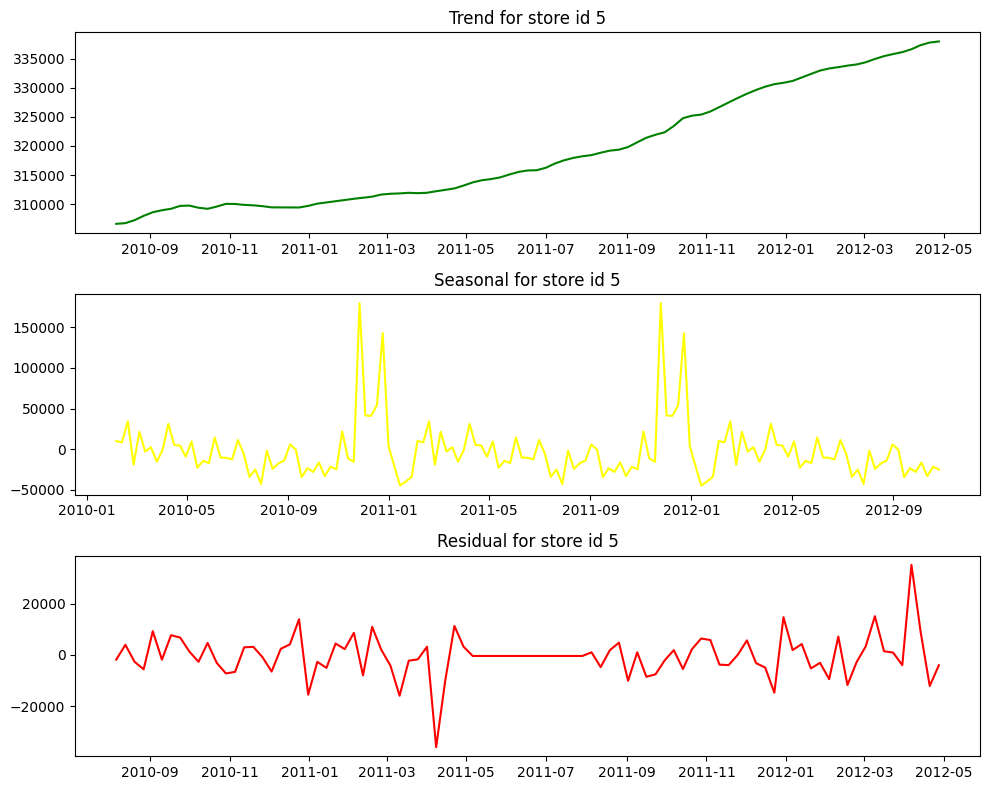

In [221]:
def plotSeasonalDecomposition(df,store_id):
    data_weekly1 = df[df['Store'] == store_id]
    data_weekly2 = data_weekly1[['Date','Weekly_Sales']]
    data_weekly2.set_index("Date",inplace=True)
    decmp = seasonal_decompose(pd.Series(data_weekly2['Weekly_Sales']))
    fig ,ax =plt.subplots(3,1, figsize=(10,8))
    # plt.plot(decmp.trend , color='red')
    # plt.plot(decmp.seasonal , color='red')
    # plt.plot(decmp.resid , color='red')
    ax[0].plot(decmp.trend , color='green')
    ax[0].set_title(f'Trend for store id {store_id}')
    ax[1].plot(decmp.seasonal , color='yellow')
    ax[1].set_title(f'Seasonal for store id {store_id}')
    ax[2].plot(decmp.resid , color='red')
    ax[2].set_title(f'Residual for store id {store_id}')
    plt.tight_layout()
    plt.show()


## pass any store number for plotting of each 
plotSeasonalDecomposition(walmart,5)

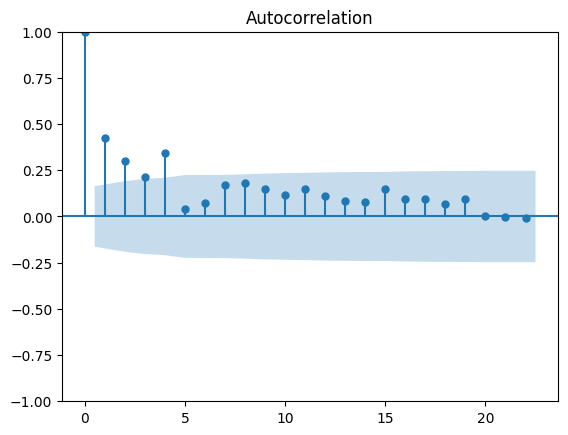

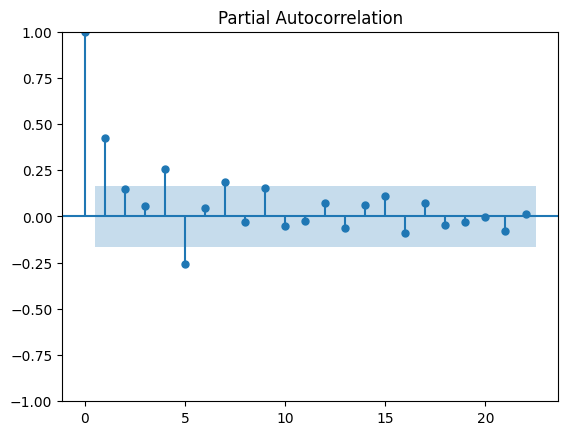

In [204]:
def plotACF_PACF(df ,store_number):
    data_weekly = df[walmart['Store'] == store_number]
    data_weekly = data_weekly[['Date', 'Weekly_Sales']]
    data_weekly.set_index('Date' ,inplace=True)
    plot_acf(data_weekly['Weekly_Sales'])
    plt.show()
    plt.close()
    plot_pacf(data_weekly['Weekly_Sales'])
    plt.show()
    plt.close()


## pass any store number for plotting of each 
plotACF_PACF(walmart , 4) 

### Using auto_arima to validate best AR, I , MA values 

In [205]:
def autoArima(df, store_id):
    data_weekly1 = df[walmart['Store'] == store_id]
    data_weekly1 = data_weekly1[['Date','Weekly_Sales']]
    # data_weekly1['Weekly_Sales'] = data_weekly1['Weekly_Sales'].astype(int)
    data_weekly1.set_index("Date",inplace=True)
    # train = data_weekly1[:100]
    # test = data_weekly1[101:143]
    model = auto_arima(data_weekly1 , start_p=0 , start_q=0 , max_p=10 , max_q=10 , seasonal=True,suppress_warnings=True , stepwise=True,trace= True  )
    print(model.summary())
    # model_2 = SARIMAX(data_weekly1 , order=(2, 1, 3) , seasonal_order = (2, 1, 3 , 12))
    # result = model_2.fit()
    # forecast = result.forecast(steps=12)
    # plt.figure(figsize=(15,8))
    # plt.plot(data_weekly1 , label ="Original Data" ,color = 'red')
    # plt.plot(forecast , label = 'Fitted' , color='yellow')
    # plt.show()
    
    

In [206]:
# model_2 = ARIMA()
autoArima(walmart ,3)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3448.550, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3435.218, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3429.846, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3446.564, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3426.121, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3426.738, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3425.509, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3429.113, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3427.286, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3430.518, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3430.138, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3424.038, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3427.225, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : 

In [207]:
def plotSARIMAX(df, store_id):
    data_weekly1 = df[walmart['Store'] == store_id]
    data_weekly1 = data_weekly1[['Date','Weekly_Sales']]
    # data_weekly1['Weekly_Sales'] = data_weekly1['Weekly_Sales'].astype(int)
    data_weekly1.set_index("Date",inplace=True)
    
    #check order from autoARIMA for p,d,q values
    model_2 = SARIMAX(data_weekly1 , order=(1,1,1) , seasonal_order = (1,1,1 , 22))
    result = model_2.fit()
    forecast = result.forecast(steps=22)
    plt.figure(figsize=(15,8))
    plt.plot(data_weekly1 , label ="Original Data" ,color = 'blue')
    plt.plot(forecast , label = 'Fitted' , color='yellow')
    plt.legend()
    plt.show()
    


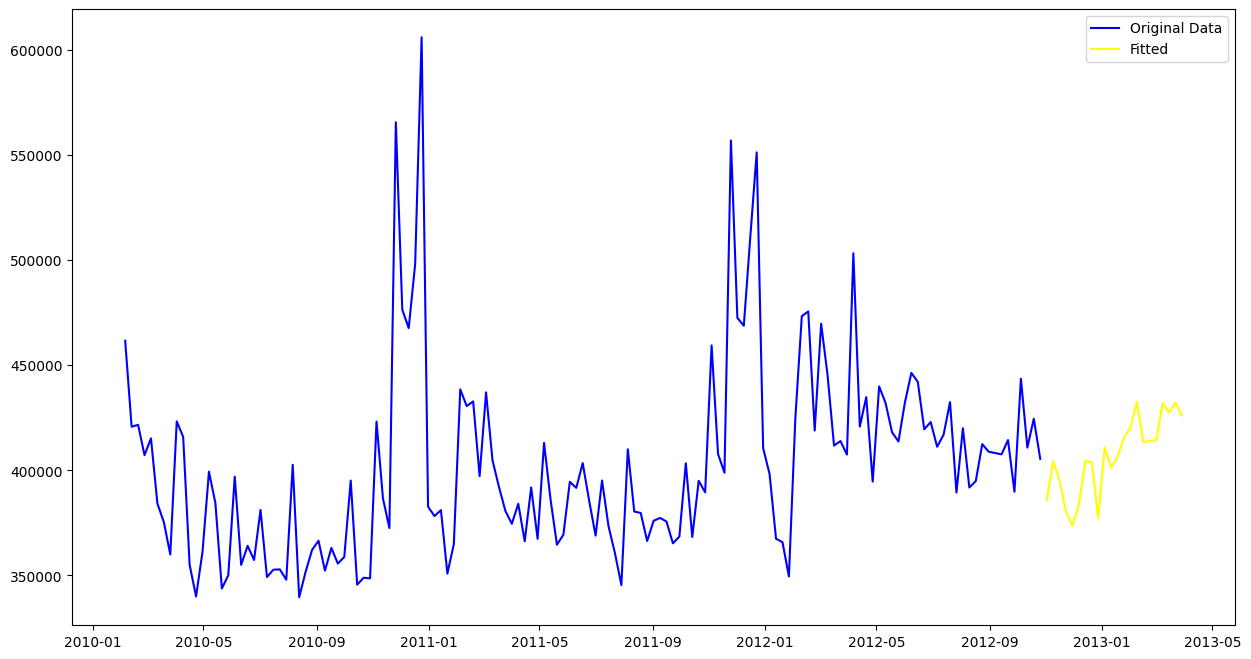

In [208]:
plotSARIMAX(walmart ,3)

### Using Prophet to predict the forecast

In [209]:
from prophet import Prophet

In [210]:
model = Prophet(interval_width=0.95)

In [211]:
de = walmart[['Date','Weekly_Sales']]


de.rename(columns={'Date' : 'ds' , 'Weekly_Sales' : 'y'} , inplace=True)

model.fit(de)

19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing


In [212]:
future_dates = model.make_future_dataframe(periods=12 , freq='W')

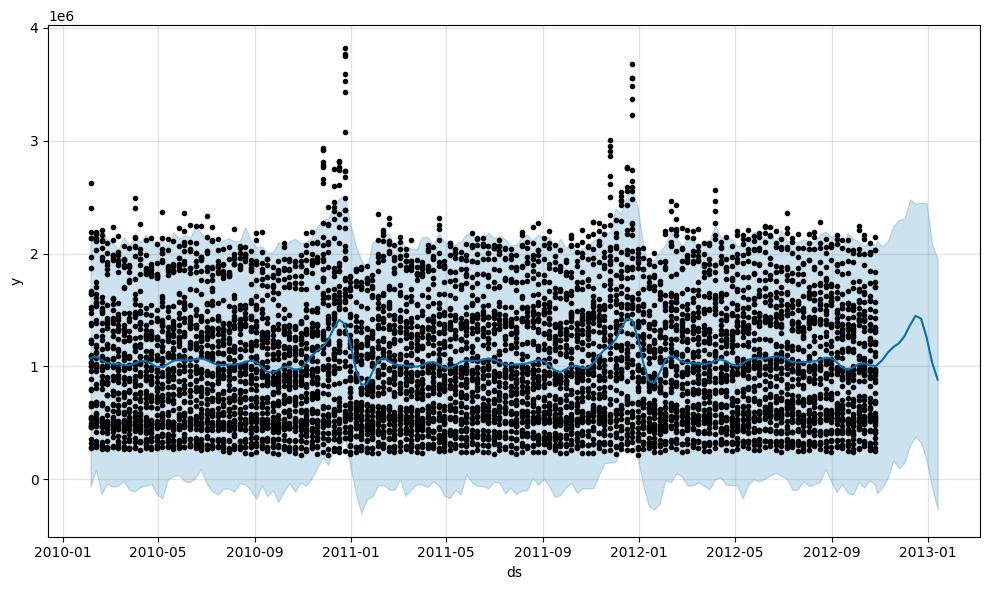

In [213]:
forecast = model.predict(future_dates)
sales_forecast = model.plot(forecast)


In [214]:
se = forecast[['ds' , 'yhat']]
se.set_index('ds' , inplace=True)
se


,yhat
ds,
2010-02-05,1.072789e+06
2010-02-12,1.086875e+06
2010-02-19,1.055561e+06
2010-02-26,1.028601e+06
2010-03-05,1.022488e+06
...,...
2012-12-16,1.448494e+06
2012-12-23,1.422388e+06
2012-12-30,1.257499e+06
